In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras

In [33]:
df = pd.read_csv('BreastCancerData (4).csv')

In [34]:
df.head()

,Age,BMI,BreastFeeding,Marital Status,Alcohol,Smoking,BreastCancerHistory,Age at firstPeriod,MenstrualCycle,Cancer Positive
0,48,8.543723,1,1,0,0,0,15,1,0
1,31,10.204207,1,1,0,0,0,12,1,0
2,31,13.807133,1,1,0,0,0,14,1,0
3,33,14.088867,1,1,1,0,0,12,1,0
4,49,14.494061,1,1,0,0,0,15,1,0


In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2388.0,41.029313,7.694522,21.000000,35.000000,41.000000,48.000000,54.0
BMI,2388.0,24.723056,4.939623,8.543723,21.168699,24.453841,27.657793,69.5
BreastFeeding,2388.0,0.891122,0.311551,0.000000,1.000000,1.000000,1.000000,1.0
Marital Status,2388.0,1.126466,0.455754,1.000000,1.000000,1.000000,1.000000,3.0
Alcohol,2388.0,0.351340,0.477489,0.000000,0.000000,0.000000,1.000000,1.0
Smoking,2388.0,0.154941,0.361925,0.000000,0.000000,0.000000,0.000000,1.0
BreastCancerHistory,2388.0,0.029313,0.168718,0.000000,0.000000,0.000000,0.000000,1.0
Age at firstPeriod,2388.0,13.104690,1.684577,8.000000,12.000000,13.000000,14.000000,21.0
MenstrualCycle,2388.0,0.781826,0.413093,0.000000,1.000000,1.000000,1.000000,1.0
Cancer Positive,2388.0,0.404523,0.490902,0.000000,0.000000,0.000000,1.000000,1.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 10 columns):
Age                    2388 non-null int64
BMI                    2388 non-null float64
BreastFeeding          2388 non-null int64
Marital Status         2388 non-null int64
Alcohol                2388 non-null int64
Smoking                2388 non-null int64
BreastCancerHistory    2388 non-null int64
Age at firstPeriod     2388 non-null int64
MenstrualCycle         2388 non-null int64
Cancer Positive        2388 non-null int64
dtypes: float64(1), int64(9)
memory usage: 186.7 KB


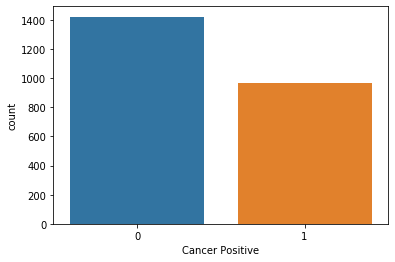

In [37]:
sns.countplot(x='Cancer Positive',data=df)

In [38]:
df.corr()['Cancer Positive'][:-1].sort_values()

MenstrualCycle        -0.527303
Age at firstPeriod    -0.143939
BreastFeeding         -0.125521
Alcohol                0.040402
Smoking                0.047929
BreastCancerHistory    0.145085
Marital Status         0.230007
BMI                    0.360163
Age                    0.387485
Name: Cancer Positive, dtype: float64

In [39]:
X = df.drop('Cancer Positive',axis=1).values
y = df['Cancer Positive'].values

In [40]:
X

array([[48.        ,  8.5437225 ,  1.        , ...,  0.        ,
        15.        ,  1.        ],
       [31.        , 10.20420723,  1.        , ...,  0.        ,
        12.        ,  1.        ],
       [31.        , 13.80713296,  1.        , ...,  0.        ,
        14.        ,  1.        ],
       ...,
       [51.        , 44.17113007,  0.        , ...,  1.        ,
        14.        ,  0.        ],
       [41.        , 57.76097459,  1.        , ...,  0.        ,
        13.        ,  1.        ],
       [35.        , 69.5       ,  1.        , ...,  1.        ,
        15.        ,  1.        ]])

In [41]:
X.shape

(2388, 9)

In [42]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [43]:
y.shape

(2388,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(1791, 9)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9, )))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [53]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),batch_size=128)

Train on 1791 samples, validate on 597 samples
Epoch 1/1000
1791/1791 [==============================] - 1s 496us/sample - loss: 0.7127 - val_loss: 0.7007
Epoch 2/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.6882 - val_loss: 0.6821
Epoch 3/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.6703 - val_loss: 0.6683
Epoch 4/1000
1791/1791 [==============================] - ETA: 0s - loss: 0.667 - 0s 37us/sample - loss: 0.6571 - val_loss: 0.6570
Epoch 5/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.6469 - val_loss: 0.6458
Epoch 6/1000
1791/1791 [==============================] - 0s 35us/sample - loss: 0.6369 - val_loss: 0.6346
Epoch 7/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.6273 - val_loss: 0.6237
Epoch 8/1000
1791/1791 [==============================] - 0s 42us/sample - loss: 0.6183 - val_loss: 0.6139
Epoch 9/1000
1791/1791 [==============================] - 0s 37us/sample

1791/1791 [==============================] - 0s 31us/sample - loss: 0.3379 - val_loss: 0.3229
Epoch 77/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.3366 - val_loss: 0.3212
Epoch 78/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.3361 - val_loss: 0.3212
Epoch 79/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.3351 - val_loss: 0.3216
Epoch 80/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.3339 - val_loss: 0.3193
Epoch 81/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.3338 - val_loss: 0.3252
Epoch 82/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.3341 - val_loss: 0.3185
Epoch 83/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.3337 - val_loss: 0.3181
Epoch 84/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.3336 - val_loss: 0.3211
Epoch 85/1000
1791/1791 [=================

1791/1791 [==============================] - 0s 31us/sample - loss: 0.2964 - val_loss: 0.2963
Epoch 152/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.2959 - val_loss: 0.2984
Epoch 153/1000
1791/1791 [==============================] - 0s 35us/sample - loss: 0.2955 - val_loss: 0.2960
Epoch 154/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2960 - val_loss: 0.2989
Epoch 155/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2943 - val_loss: 0.2948
Epoch 156/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.2941 - val_loss: 0.2976
Epoch 157/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2930 - val_loss: 0.2955
Epoch 158/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.2923 - val_loss: 0.2956
Epoch 159/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2918 - val_loss: 0.2936
Epoch 160/1000
1791/1791 [========

1791/1791 [==============================] - 0s 29us/sample - loss: 0.2626 - val_loss: 0.2732
Epoch 227/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.2611 - val_loss: 0.2753
Epoch 228/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2603 - val_loss: 0.2717
Epoch 229/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2606 - val_loss: 0.2748
Epoch 230/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2604 - val_loss: 0.2738
Epoch 231/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2609 - val_loss: 0.2693
Epoch 232/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2606 - val_loss: 0.2737
Epoch 233/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2596 - val_loss: 0.2718
Epoch 234/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2590 - val_loss: 0.2708
Epoch 235/1000
1791/1791 [========

1791/1791 [==============================] - 0s 30us/sample - loss: 0.2382 - val_loss: 0.2635
Epoch 302/1000
1791/1791 [==============================] - ETA: 0s - loss: 0.270 - 0s 40us/sample - loss: 0.2378 - val_loss: 0.2549
Epoch 303/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.2375 - val_loss: 0.2552
Epoch 304/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2377 - val_loss: 0.2588
Epoch 305/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2372 - val_loss: 0.2536
Epoch 306/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2369 - val_loss: 0.2580
Epoch 307/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2361 - val_loss: 0.2552
Epoch 308/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2370 - val_loss: 0.2587
Epoch 309/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.2364 - val_loss: 0.2558
Epoch 310/

1791/1791 [==============================] - 0s 35us/sample - loss: 0.2248 - val_loss: 0.2520
Epoch 377/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.2231 - val_loss: 0.2439
Epoch 378/1000
1791/1791 [==============================] - 0s 37us/sample - loss: 0.2233 - val_loss: 0.2427
Epoch 379/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.2208 - val_loss: 0.2453
Epoch 380/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.2215 - val_loss: 0.2442
Epoch 381/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2210 - val_loss: 0.2464
Epoch 382/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2206 - val_loss: 0.2421
Epoch 383/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.2214 - val_loss: 0.2508
Epoch 384/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.2236 - val_loss: 0.2401
Epoch 385/1000
1791/1791 [========

1791/1791 [==============================] - 0s 32us/sample - loss: 0.2093 - val_loss: 0.2342
Epoch 452/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.2086 - val_loss: 0.2367
Epoch 453/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.2089 - val_loss: 0.2356
Epoch 454/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.2090 - val_loss: 0.2381
Epoch 455/1000
1791/1791 [==============================] - 0s 40us/sample - loss: 0.2088 - val_loss: 0.2319
Epoch 456/1000
1791/1791 [==============================] - 0s 37us/sample - loss: 0.2106 - val_loss: 0.2395
Epoch 457/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.2115 - val_loss: 0.2423
Epoch 458/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.2114 - val_loss: 0.2327
Epoch 459/1000
1791/1791 [==============================] - 0s 37us/sample - loss: 0.2075 - val_loss: 0.2362
Epoch 460/1000
1791/1791 [========

1791/1791 [==============================] - 0s 26us/sample - loss: 0.1982 - val_loss: 0.2221
Epoch 527/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1977 - val_loss: 0.2257
Epoch 528/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1985 - val_loss: 0.2223
Epoch 529/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1977 - val_loss: 0.2216
Epoch 530/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.2020 - val_loss: 0.2321
Epoch 531/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1991 - val_loss: 0.2230
Epoch 532/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1985 - val_loss: 0.2195
Epoch 533/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1981 - val_loss: 0.2242
Epoch 534/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1975 - val_loss: 0.2197
Epoch 535/1000
1791/1791 [========

1791/1791 [==============================] - 0s 28us/sample - loss: 0.1944 - val_loss: 0.2128
Epoch 602/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1943 - val_loss: 0.2115
Epoch 603/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1955 - val_loss: 0.2183
Epoch 604/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1930 - val_loss: 0.2232
Epoch 605/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1956 - val_loss: 0.2113
Epoch 606/1000
1791/1791 [==============================] - 0s 24us/sample - loss: 0.1943 - val_loss: 0.2119
Epoch 607/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1938 - val_loss: 0.2242
Epoch 608/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.1928 - val_loss: 0.2134
Epoch 609/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1909 - val_loss: 0.2114
Epoch 610/1000
1791/1791 [========

1791/1791 [==============================] - 0s 33us/sample - loss: 0.1866 - val_loss: 0.2042
Epoch 677/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1846 - val_loss: 0.2131
Epoch 678/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1862 - val_loss: 0.2074
Epoch 679/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1842 - val_loss: 0.2053
Epoch 680/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1840 - val_loss: 0.2064
Epoch 681/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1839 - val_loss: 0.2049
Epoch 682/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1846 - val_loss: 0.2065
Epoch 683/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1852 - val_loss: 0.2102
Epoch 684/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1841 - val_loss: 0.2043
Epoch 685/1000
1791/1791 [========

1791/1791 [==============================] - 0s 27us/sample - loss: 0.1788 - val_loss: 0.1985
Epoch 752/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1794 - val_loss: 0.2046
Epoch 753/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1812 - val_loss: 0.1980
Epoch 754/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1797 - val_loss: 0.1995
Epoch 755/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1791 - val_loss: 0.1985
Epoch 756/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1823 - val_loss: 0.2130
Epoch 757/1000
1791/1791 [==============================] - 0s 38us/sample - loss: 0.1819 - val_loss: 0.1981
Epoch 758/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1808 - val_loss: 0.1971
Epoch 759/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1817 - val_loss: 0.2107
Epoch 760/1000
1791/1791 [========

1791/1791 [==============================] - 0s 40us/sample - loss: 0.1759 - val_loss: 0.1920
Epoch 827/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1750 - val_loss: 0.1991
Epoch 828/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1747 - val_loss: 0.1958
Epoch 829/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1741 - val_loss: 0.1928
Epoch 830/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1737 - val_loss: 0.1944
Epoch 831/1000
1791/1791 [==============================] - 0s 23us/sample - loss: 0.1735 - val_loss: 0.1936
Epoch 832/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.1736 - val_loss: 0.1939
Epoch 833/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1737 - val_loss: 0.1930
Epoch 834/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1737 - val_loss: 0.1925
Epoch 835/1000
1791/1791 [========

1791/1791 [==============================] - 0s 28us/sample - loss: 0.1727 - val_loss: 0.1905
Epoch 902/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1705 - val_loss: 0.1898
Epoch 903/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1718 - val_loss: 0.1868
Epoch 904/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.1740 - val_loss: 0.1884
Epoch 905/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1746 - val_loss: 0.2034
Epoch 906/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1733 - val_loss: 0.1868
Epoch 907/1000
1791/1791 [==============================] - 0s 27us/sample - loss: 0.1737 - val_loss: 0.1871
Epoch 908/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1735 - val_loss: 0.1893
Epoch 909/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.1711 - val_loss: 0.1936
Epoch 910/1000
1791/1791 [========

1791/1791 [==============================] - 0s 31us/sample - loss: 0.1657 - val_loss: 0.1801
Epoch 977/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.1650 - val_loss: 0.1780
Epoch 978/1000
1791/1791 [==============================] - 0s 35us/sample - loss: 0.1652 - val_loss: 0.1772
Epoch 979/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.1650 - val_loss: 0.1782
Epoch 980/1000
1791/1791 [==============================] - 0s 35us/sample - loss: 0.1655 - val_loss: 0.1847
Epoch 981/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.1682 - val_loss: 0.1758
Epoch 982/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.1672 - val_loss: 0.1763
Epoch 983/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1658 - val_loss: 0.1783
Epoch 984/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.1666 - val_loss: 0.1823
Epoch 985/1000
1791/1791 [========

In [54]:
losses = pd.DataFrame(model.history.history)

In [55]:
losses

,loss,val_loss
0,0.712748,0.700726
1,0.688224,0.682106
2,0.670312,0.668250
3,0.657111,0.656975
4,0.646888,0.645809
...,...,...
995,0.163639,0.175898
996,0.163686,0.174040
997,0.164532,0.180119
998,0.164506,0.174437


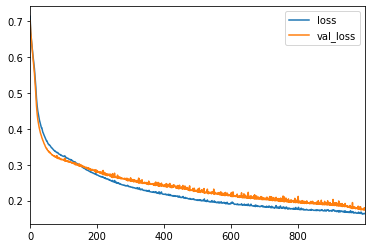

In [56]:
losses.plot()

In [57]:
model = Sequential()

model.add(Dense(9,activation='relu',input_shape=(9, )))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [60]:
model.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),
         callbacks=[early_stop],batch_size=128)

Train on 1791 samples, validate on 597 samples
Epoch 1/1000
1791/1791 [==============================] - 1s 425us/sample - loss: 0.6931 - val_loss: 0.7024
Epoch 2/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.6794 - val_loss: 0.6880
Epoch 3/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.6678 - val_loss: 0.6753
Epoch 4/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.6560 - val_loss: 0.6611
Epoch 5/1000
1791/1791 [==============================] - 0s 31us/sample - loss: 0.6430 - val_loss: 0.6457
Epoch 6/1000
1791/1791 [==============================] - 0s 32us/sample - loss: 0.6261 - val_loss: 0.6229
Epoch 7/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.6067 - val_loss: 0.6006
Epoch 8/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.5887 - val_loss: 0.5814
Epoch 9/1000
1791/1791 [==============================] - 0s 35us/sample - loss: 0.5728 - val_lo

1791/1791 [==============================] - 0s 28us/sample - loss: 0.3459 - val_loss: 0.3291
Epoch 77/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.3443 - val_loss: 0.3259
Epoch 78/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.3438 - val_loss: 0.3277
Epoch 79/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.3434 - val_loss: 0.3256
Epoch 80/1000
1791/1791 [==============================] - 0s 30us/sample - loss: 0.3431 - val_loss: 0.3259
Epoch 81/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.3421 - val_loss: 0.3251
Epoch 82/1000
1791/1791 [==============================] - 0s 38us/sample - loss: 0.3425 - val_loss: 0.3232
Epoch 83/1000
1791/1791 [==============================] - 0s 37us/sample - loss: 0.3429 - val_loss: 0.3246
Epoch 84/1000
1791/1791 [==============================] - 0s 33us/sample - loss: 0.3445 - val_loss: 0.3222
Epoch 85/1000
1791/1791 [=================

1791/1791 [==============================] - 0s 32us/sample - loss: 0.3228 - val_loss: 0.3160
Epoch 152/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.3231 - val_loss: 0.3177
Epoch 153/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.3225 - val_loss: 0.3165
Epoch 154/1000
1791/1791 [==============================] - 0s 34us/sample - loss: 0.3224 - val_loss: 0.3183
Epoch 155/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.3227 - val_loss: 0.3167
Epoch 156/1000
1791/1791 [==============================] - 0s 29us/sample - loss: 0.3217 - val_loss: 0.3170
Epoch 157/1000
1791/1791 [==============================] - 0s 26us/sample - loss: 0.3227 - val_loss: 0.3189
Epoch 158/1000
1791/1791 [==============================] - 0s 28us/sample - loss: 0.3225 - val_loss: 0.3190
Epoch 159/1000
1791/1791 [==============================] - 0s 25us/sample - loss: 0.3214 - val_loss: 0.3168
Epoch 160/1000
1791/1791 [========

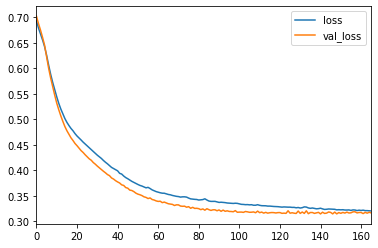

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [62]:
predictions = model.predict_classes(X_test)

In [63]:
predictions

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_test,predictions))

[[327  22]
 [ 58 190]]


In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       349
           1       0.90      0.77      0.83       248

    accuracy                           0.87       597
   macro avg       0.87      0.85      0.86       597
weighted avg       0.87      0.87      0.86       597



In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save('final_ANN_model1.h5')

In [69]:
new_data = df.drop('Cancer Positive',axis=1).iloc[1]

In [70]:
new_data

Age                    31.000000
BMI                    10.204207
BreastFeeding           1.000000
Marital Status          1.000000
Alcohol                 0.000000
Smoking                 0.000000
BreastCancerHistory     0.000000
Age at firstPeriod     12.000000
MenstrualCycle          1.000000
Name: 1, dtype: float64

In [71]:
new_data = scaler.transform(new_data.values.reshape(-1,9))

In [72]:
new_data

array([[0.28125   , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.30769231, 1.        ]])

In [73]:
model.predict(new_data)

array([[0.00409736]], dtype=float32)

In [74]:
model.predict_classes(new_data)

array([[0]])

In [75]:
model.predict_proba(new_data)[0][0]*100

0.40973578579723835

In [76]:
later_model = load_model('final_ANN_model1.h5')

In [77]:
later_model.predict(new_data)

array([[0.00409736]], dtype=float32)